In [31]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# Read the data

In [89]:
data_df = pd.read_csv("train.csv")

In [90]:
data_df["fraud_ind"]

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1521757    0
1521758    0
1521759    0
1521760    0
1521761    0
1521762    0
1521763    0
1521764    0
1521765    0
1521766    1
1521767    0
1521768    0
1521769    0
1521770    0
1521771    0
1521772    0
1521773    0
1521774    0
1521775    0
1521776    0
1521777    0
1521778    0
1521779    0
1521780    0
1521781    0
1521782    0
1521783    0
1521784    0
1521785    0
1521786    0
Name: fraud_ind, Length: 1521787, dtype: int64

# Check the data

In [9]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 1521787  columns: 23


# Glimpse the data

In [12]:
data_df.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [13]:
data_df.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,4.149114e+00,1.337572e-02,4.749410e+00,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,2.394259e+00,1.148774e-01,1.111927e+00,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


# Check the missing data

In [29]:
# flbmk: Fallback 註記 , flg_3dsmk: 3DS 交易註記
# 只有約18％資料有註記資訊

In [26]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)

In [28]:
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,flbmk,flg_3dsmk,txkey,fraud_ind,bacno,cano,conam,contp,csmcu,ecfg,...,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,acqic
Total,12581.000000,12581.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.826725,0.826725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data unbalance
### target value: fraud_ind ( fraud or not ; 0/1)

In [30]:
# Let's check data unbalance with respect with target value, i.e.  fruad _ind

In [48]:
# value_counts()
temp = data_df["fraud_ind"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})
trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

# Data exploration

## 1.transaction in time
### pdf: 面積表發生機率，曲線所有面積加總為1
### fraud: Fraudulent transactions have a distribution more even than valid transactions - 
### are equaly distributed in time, including the low real transaction times.

In [49]:
# class_0: 所有交易紀錄中 valid transaction發生的時間; class_1:所有交易紀錄中,fraudulent transaction 發生的時間
class_0 = data_df.loc[data_df['fraud_ind'] == 0]["loctm"]
class_1 = data_df.loc[data_df['fraud_ind'] == 1]["loctm"]

In [57]:
class_0

0          172652.0
1          105114.0
2          152458.0
3          172946.0
4          182129.0
5          104918.0
6          172624.0
7           34933.0
8           64652.0
9          104447.0
10         210254.0
11         104728.0
12         172346.0
13         191233.0
14         164857.0
15         104917.0
16         142028.0
17         114348.0
18         225727.0
19         153959.0
20         143657.0
21         105021.0
22         192156.0
23         121947.0
24         150613.0
25         195207.0
26         175543.0
27          91927.0
28          21157.0
29         104853.0
             ...   
1521756    173708.0
1521757    225025.0
1521758    100451.0
1521759    202101.0
1521760    231652.0
1521761    141754.0
1521762     92344.0
1521763    142652.0
1521764    130453.0
1521765    170529.0
1521767    151513.0
1521768    193923.0
1521769    113651.0
1521770       238.0
1521771    192135.0
1521772    190721.0
1521773     44158.0
1521774    194234.0
1521775    141800.0


In [58]:
class_1

70          45457.0
349        154137.0
1133       172810.0
1208       112902.0
1254        45823.0
1888       125847.0
2090       125656.0
2156       120845.0
2465        70825.0
3297       204413.0
3386        44738.0
3550       185550.0
3576       232848.0
3579       190808.0
3994       225400.0
4083       110626.0
4384        10519.0
4420       195752.0
4531       155509.0
4714       225316.0
5139       182911.0
5147       182925.0
6130        83600.0
6519       131535.0
6688         4125.0
7233       161230.0
7432       121546.0
7569         4105.0
7576       223537.0
7583        10550.0
             ...   
1520066    230654.0
1520312    192249.0
1520353    181113.0
1520369     61928.0
1520396     45128.0
1520406    103424.0
1520461     71140.0
1520476    220630.0
1520480     24730.0
1520615    213153.0
1520689     95917.0
1520771    172616.0
1520780    192259.0
1520841     45354.0
1520871     60415.0
1520900    152817.0
1521220     23932.0
1521258    225418.0
1521301     81744.0


In [50]:
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']


In [54]:
hist_data

[0          172652.0
 1          105114.0
 2          152458.0
 3          172946.0
 4          182129.0
 5          104918.0
 6          172624.0
 7           34933.0
 8           64652.0
 9          104447.0
 10         210254.0
 11         104728.0
 12         172346.0
 13         191233.0
 14         164857.0
 15         104917.0
 16         142028.0
 17         114348.0
 18         225727.0
 19         153959.0
 20         143657.0
 21         105021.0
 22         192156.0
 23         121947.0
 24         150613.0
 25         195207.0
 26         175543.0
 27          91927.0
 28          21157.0
 29         104853.0
              ...   
 1521756    173708.0
 1521757    225025.0
 1521758    100451.0
 1521759    202101.0
 1521760    231652.0
 1521761    141754.0
 1521762     92344.0
 1521763    142652.0
 1521764    130453.0
 1521765    170529.0
 1521767    151513.0
 1521768    193923.0
 1521769    113651.0
 1521770       238.0
 1521771    192135.0
 1521772    190721.0
 1521773     

In [51]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

## 2.Transactions amount
### 交易金額
### The real transaction(class=0) larger Q1, smaller Q2,Q3 and Q4 and larger outliers; 
### fraudulent transactions(class=1) have a smaller Q1 and mean, largerQ2, Q4 and smaller outliers.

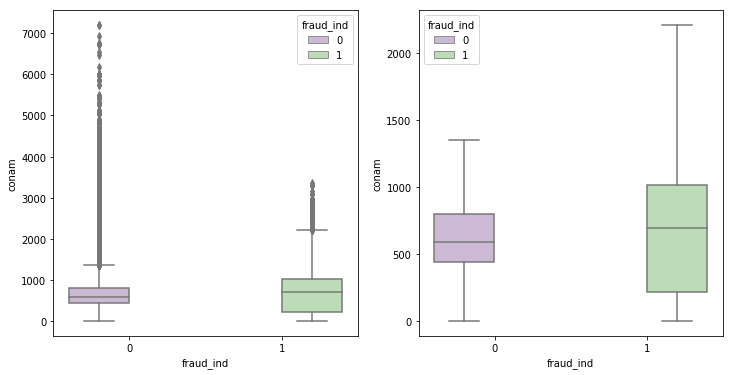

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="fraud_ind", y="conam", hue="fraud_ind",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="fraud_ind", y="conam", hue="fraud_ind",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [59]:
data_df

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004
5,0,78377,2295,465.62,5,0,N,2,N,N,...,0,6,104918.0,451,0,N,5817,102,0,2943
6,6411,94435,49219,1806.49,3,62,N,4,N,N,...,0,6,172624.0,339,0,N,5865,102,0,1622153
7,6769,112032,177989,526.88,6,62,N,2,N,N,...,0,7,34933.0,373,79200,N,5817,102,0,57795
8,6092,92294,85535,201.39,2,62,N,2,N,N,...,0,6,64652.0,264,8335,N,3585,102,0,836165
9,0,16279,110755,465.62,5,0,N,2,N,N,...,0,10,104447.0,451,0,N,5817,102,0,4507


In [64]:
tmp = data_df[['conam','fraud_ind']].copy()
class_0 = tmp.loc[tmp['fraud_ind'] == 0]['conam']
class_1 = tmp.loc[tmp['fraud_ind'] == 1]['conam']
class_0.describe()

count    1.501432e+06
mean     6.539417e+02
std      4.000886e+02
min      0.000000e+00
25%      4.382100e+02
50%      5.915500e+02
75%      8.037000e+02
max      7.208770e+03
Name: conam, dtype: float64

In [65]:
class_1.describe()

count    20355.000000
mean       712.266507
std        565.645161
min          0.000000
25%        216.120000
50%        696.350000
75%       1016.340000
max       3353.250000
Name: conam, dtype: float64

In [68]:
# Let's plot the fraudulent transactions (amount) against time. 

In [67]:
fraud = data_df.loc[data_df['fraud_ind'] == 1]
trace = go.Scatter(
    x = fraud['loctm'],y = fraud['conam'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['conam'], # 游標顯示的資訊 -> 顯示amount
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

# 3.Features correlation

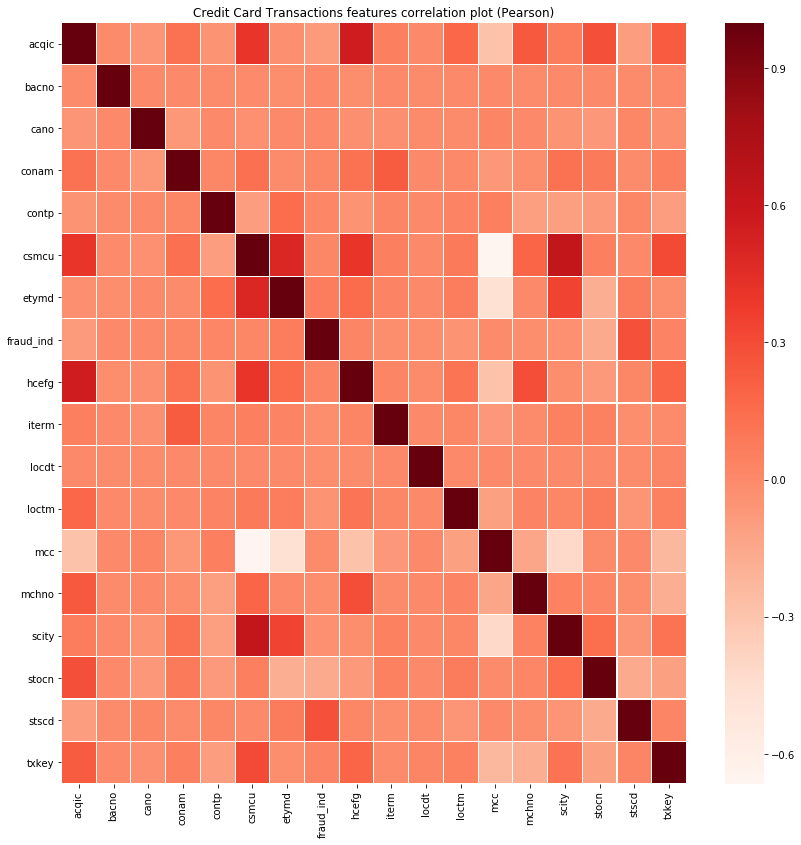

In [69]:
# csmcu & scity positive correlation (幣別與消費城市)
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [ ]:
#Let's plot the correlated and inverse correlated values on the same graph.
#Let's start with the direct correlated values: {scity; csmcu} and {hcefg; acqic}

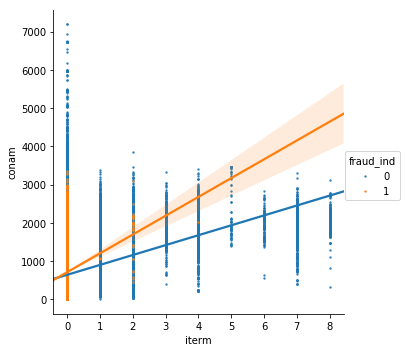

In [76]:
s = sns.lmplot(x='iterm', y='conam',data=data_df, hue='fraud_ind', fit_reg=True,scatter_kws={'s':2})
#s = sns.lmplot(x='etymd', y='conam',data=data_df, hue='fraud_ind', fit_reg=True,scatter_kws={'s':2})
plt.show()

In [99]:
data_df.info()

object_col = [ 'ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null int64
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null int64
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null int64
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(19), object(2)
memory usage

# 4. Features density plot
## 。clarily seperatated distribution:  ecfg(網路交易註記),etymd(交易型態)
## 。partialy seperated: hcefg(支付型態),stscd(狀態碼),contp(交易類別)
## 。distinct profiles: loctm(授權時間),conam(交易量)
## 。similar profiles: ovrlt(超額註記碼), iterm(分期期數),insfg(分期交易註記),fg_3d(3DS交易註記),flbmk(fallback註記)
    

In [94]:
# 把Y,N 轉1,0
for i in object_col:
    data_df.loc[data_df[i]=="Y",i]=1
    data_df.loc[data_df[i]=="N",i]=0

/Applications/anaconda/envs/mypython3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/Applications/anaconda/envs/mypython3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



<Figure size 432x288 with 0 Axes>

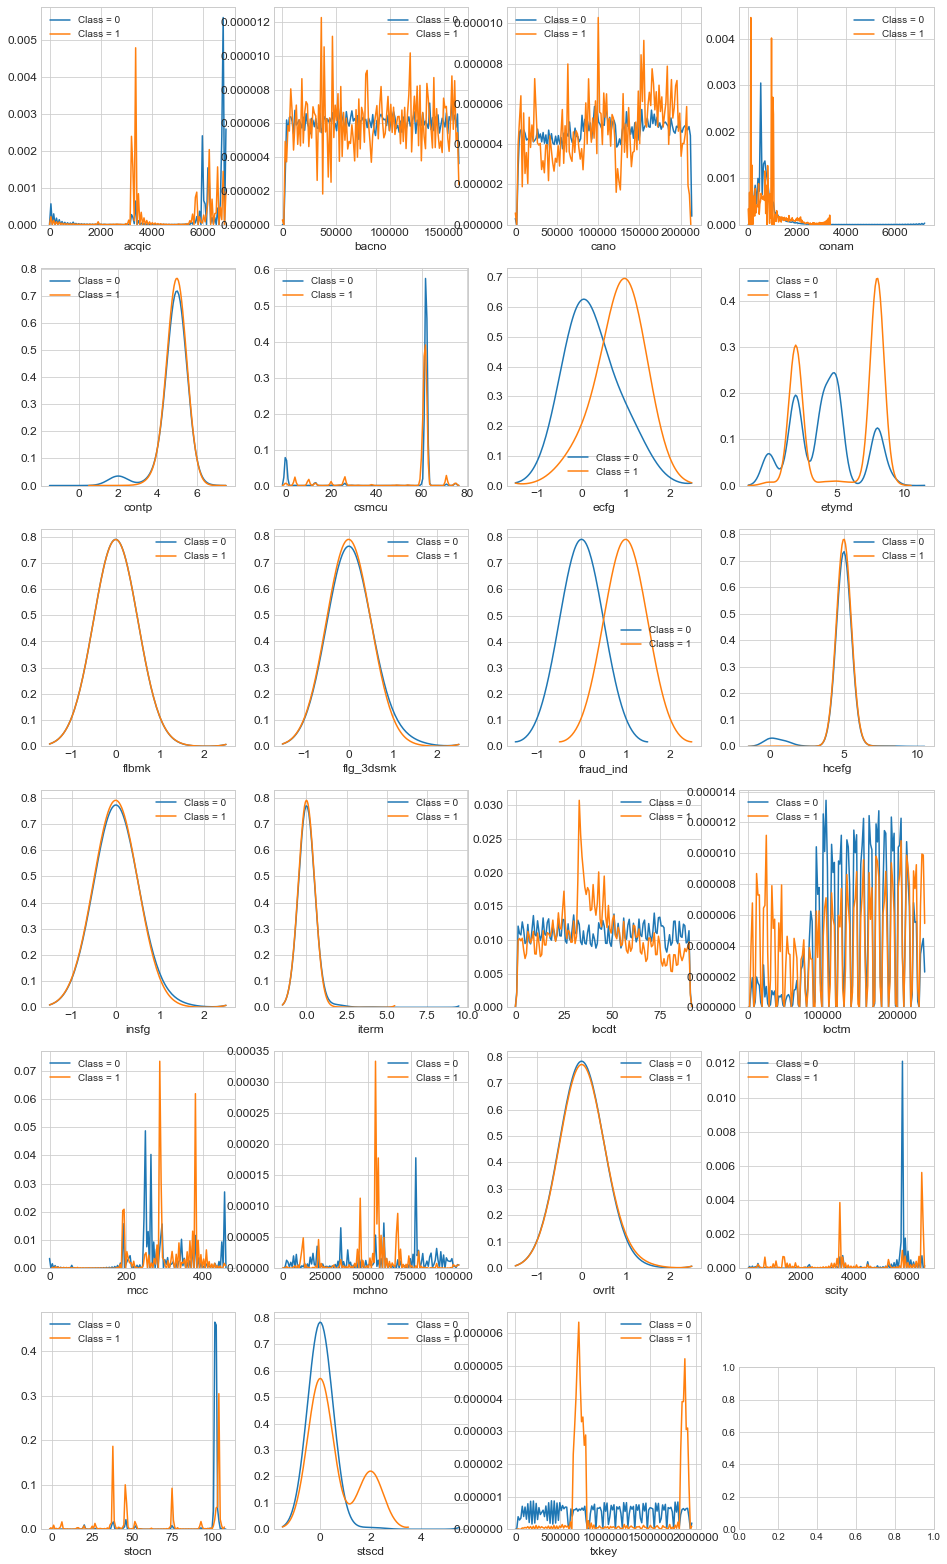

In [98]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['fraud_ind'] == 0]
t1 = data_df.loc[data_df['fraud_ind'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(6,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();